In [72]:
# ANALYSIS OF THE RESULTS IN PDF FILE "PHARMA_ANALYSIS" 
# UPLOADED TOGETHER WITH THIS CHALLENGE_5_R3.IPYNB FILE

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Import data files into dataframes
mouse_metadata_path = "/Users/hugotroche/Desktop/Bootcamp/Challenges/Challenge 5 /Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/hugotroche/Desktop/Bootcamp/Challenges/Challenge 5 /Pymaceuticals/data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine both dataframes into one dataframe called "mouse_study"
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display "mouse_study"
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
# counting the unique instances of Mouse ID - output suggests duplicates of g989
unique_counts = mouse_study[['Mouse ID']].value_counts()
print(unique_counts)

Mouse ID
g989        13
a203        10
n364        10
m546        10
m550        10
            ..
x226         1
b447         1
f932         1
l872         1
n482         1
Name: count, Length: 249, dtype: int64


<Axes: title={'center': 'Unique Value Counts'}, xlabel='Unique Values', ylabel='Count'>

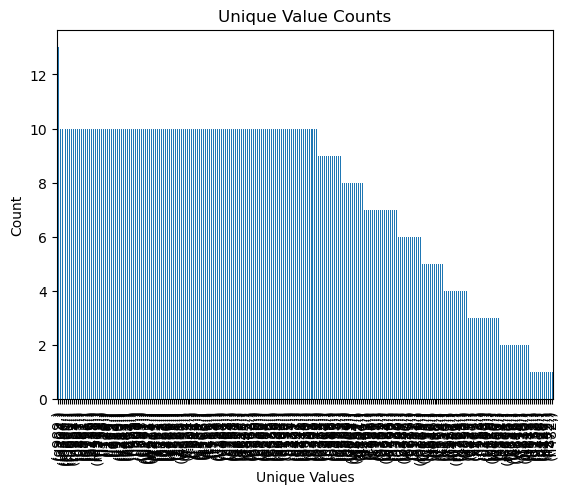

In [74]:
# Plotting the unique counts in a bar plot, showing clearly that not all instances of the study were recorded
# Sorry about the X axis clutter ....  this plot is just for visual check of incomplete data
unique_counts.plot(kind='bar', rot=90, xlabel='Unique Values', ylabel='Count', title='Unique Value Counts')


In [75]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]
print (duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [76]:
# Drop the duplicate records from the DataFrame "mouse_study"
mouse_study = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
# display the clean dataframe
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
mouse_study.describe

<bound method NDFrame.describe of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.82589

In [78]:
# Display the number of mice ID in the clean "mouse_study" DataFrame
num_mice = len(mouse_study["Mouse ID"].unique())
print(f"Number of mice in the clean mouse_study: {num_mice}")

Number of mice in the clean mouse_study: 249


In [79]:
# Generate a summary statistics table
summary_stats = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# display the summary table
print(f"statistics summary: {summary_stats}")

statistics summary:                    mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [80]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_aggregated = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# display this view of the summary information
print(f"statistics summary: {summary_stats_aggregated}")

statistics summary:                    mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


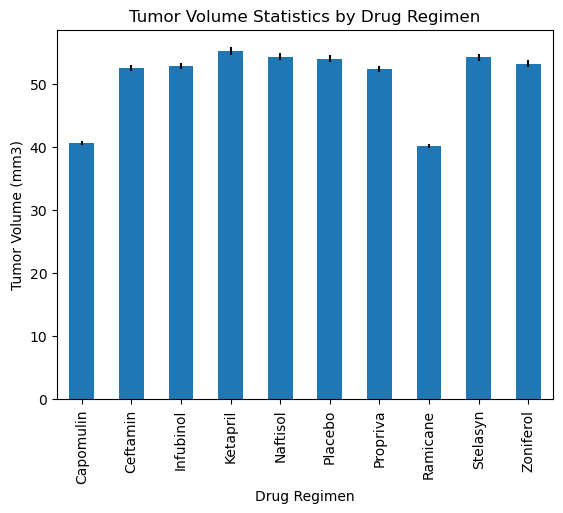

In [81]:
# 9. Generate a bar plot using Pandas
summary_stats.plot(kind='bar', y='mean', yerr='sem', legend=False)
plt.title('Tumor Volume Statistics by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

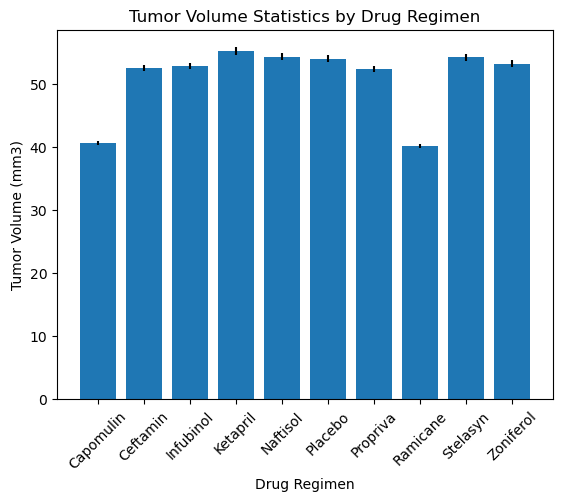

In [82]:
# Generate a bar plot using pyplot
plt.bar(summary_stats.index, summary_stats['mean'], yerr=summary_stats['sem'])
plt.title('Tumor Volume Statistics by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
# display the plot
plt.xticks(rotation=45)
plt.show()

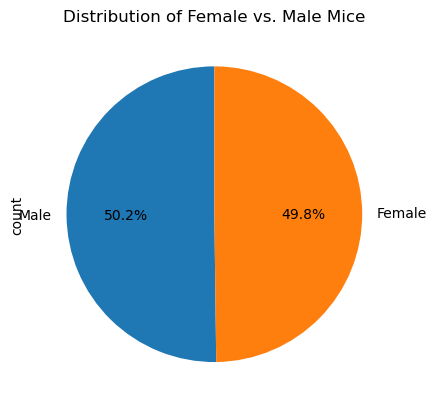

In [83]:
# Generate a pie plot using Pandas
gender_distribution = mouse_metadata["Sex"].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
#display the plot
plt.show()

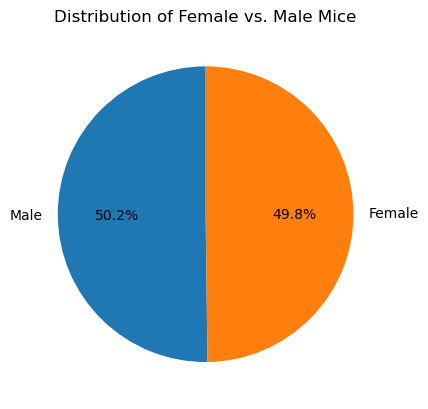

In [84]:
# Generate a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
# Display the plot
plt.show()

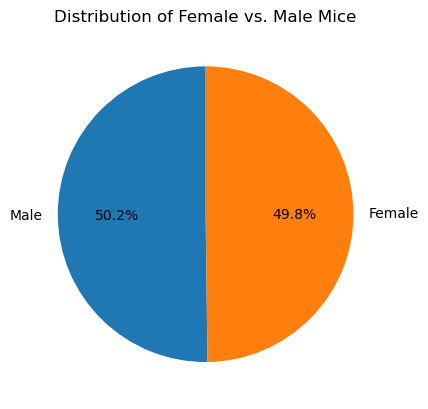

In [85]:
# Generate a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
# Display the plot
plt.show()

In [86]:
# Calculate the final tumor volume of each mouse across four drug regimens
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = mouse_study.loc[mouse_study['Drug Regimen'].isin(selected_drugs)].groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume_df = pd.merge(final_tumor_volume, mouse_study, on=['Mouse ID', 'Timepoint'])

In [87]:
# Create lists, loop through drugs, and calculate IQR and outliers
drugs = selected_drugs
Volume = []

for drug in drugs:
    drug_data = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    Volume.append(drug_data)
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug} Outliers: {outliers}")

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


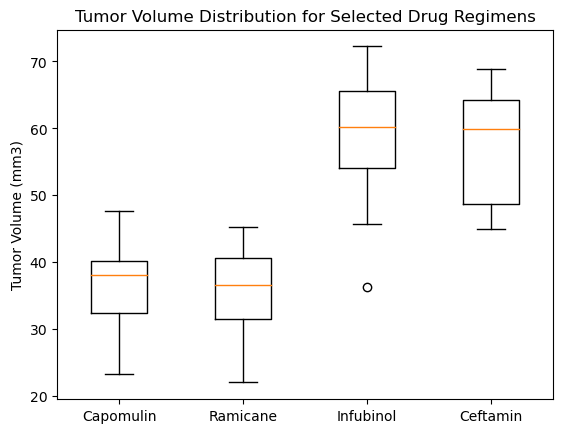

In [88]:
# Generate a box plot
plt.boxplot(Volume, labels=drugs)
plt.title('Tumor Volume Distribution for Selected Drug Regimens')
plt.ylabel('Tumor Volume (mm3)')
#display the plot
plt.show()

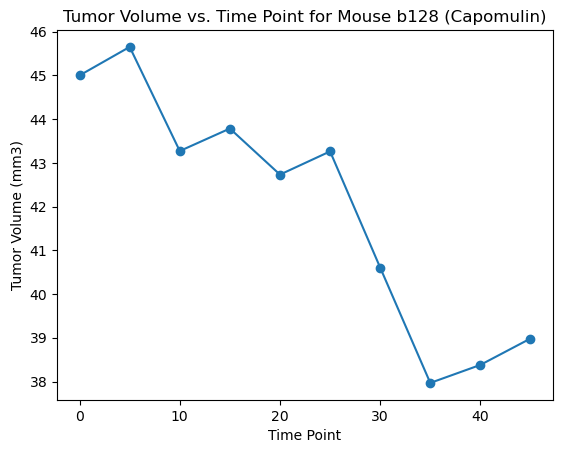

In [89]:
# Generate a line plot for a randomly selected mouse ID
mouse_b128_data = mouse_study[(mouse_study['Mouse ID'] == 'b128') & (mouse_study['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_b128_data['Timepoint'], mouse_b128_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse b128 (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
# Display the plot
plt.show()

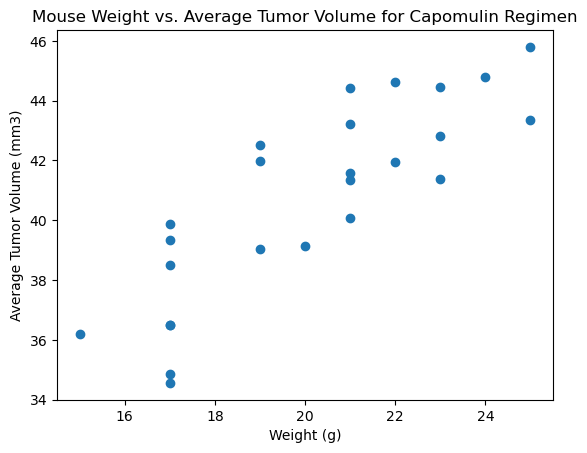

In [90]:
# Generate a scatter plot
capomulin_data = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Display the plot
plt.show()

In [91]:
# Calculate correlation coefficient and linear regression
correlation_coefficient = round(st.pearsonr(mouse_weight, average_tumor_volume)[0], 2)
# Display the correlation Coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.84


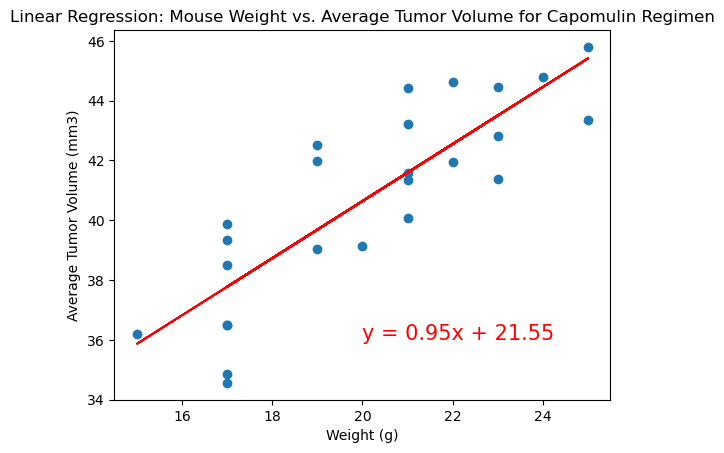

In [92]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.title('Linear Regression: Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Display the equation on the scatter plot
plt.show()

# Outliers values calculated in this REV3 for Infubinol (15) are not the same as in the starter file (31).
# I could not find the reason for the difference.

In [ ]:
# I also could not obtain the figure 248 for the unique number of mice in the clean dataframe.
# I found 249. I suspect I did not address the cleaned file correctly.